<a href="https://colab.research.google.com/github/peter-kiilu/python_course/blob/main/Road_Traffic_Accidents_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis (EDA) Case Study: Road Traffic Accidents


Author: Musila Peter

1. Introduction

Road traffic accidents are a significant cause of injuries and fatalities worldwide. Understanding the patterns and factors influencing these accidents through data analysis can help policymakers and organizations develop preventive measures. This case study involves performing Exploratory Data Analysis (EDA) on road traffic accident data from the United States to uncover key insights.

2. Objective

The primary objective of this case study is to analyze traffic accident data to identify trends, correlations, and potential causes of accidents. The findings will help propose data-driven recommendations to improve road safety.

3. Dataset Used

US Accidents (2016 - 2023)

Source: Kaggle - US Accidents Dataset

Description: This dataset includes traffic accident records across the United States, collected from multiple sources such as traffic sensors, police reports, and other tracking systems.
This is a countrywide car accident dataset that covers 49 states of the USA. The accident data were collected from February 2016 to March 2023, using multiple APIs that provide streaming traffic incident (or event) data. These APIs broadcast traffic data captured by various entities, including the US and state departments of transportation, law enforcement agencies, traffic cameras, and traffic sensors within the road networks. The dataset currently contains approximately 7.7 million accident records.

Key Features: Date/time, location, accident severity, weather conditions, road conditions, and other contributing factors.

# Import Libraries

In [7]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import plot
import warnings
warnings.filterwarnings('ignore')

# Set maximum columns to be display in datafram as 36
pd.set_option("display.max_columns", 36)
plt.style.use('seaborn-v0_8')

# Setting fontsizes,fontweight,label weight for lebels,titles.
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["axes.titlesize"] = 25
plt.rcParams["axes.titleweight"] = 'bold'
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["legend.fontsize"] = 15
plt.rcParams["legend.title_fontsize"] = 15

# Load Dataset

In [3]:
!kaggle datasets download sobhanmoosavi/us-accidents

Dataset URL: https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents
License(s): CC-BY-NC-SA-4.0
100% 653M/653M [00:05<00:00, 189MB/s]
100% 653M/653M [00:05<00:00, 128MB/s]


In [4]:
import zipfile
zip_ref = zipfile.ZipFile('/content/us-accidents.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [5]:
df = pd.read_csv('/content/US_Accidents_March23.csv', nrows=100000)


In [9]:
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Street,City,County,State,Zipcode,Country,Timezone,...,Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,I-70 E,Dayton,Montgomery,OH,45424,US,US/Eastern,...,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,Brice Rd,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,...,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at ...,State Route 32,Williamsburg,Clermont,OH,45176,US,US/Eastern,...,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,Accident on I-75 Southbound at Exits 52 52B US...,I-75 S,Dayton,Montgomery,OH,45417,US,US/Eastern,...,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,Miamisburg Centerville Rd,Dayton,Montgomery,OH,45459,US,US/Eastern,...,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day


In [10]:
# Remove columns with more than 30% missing values
threshold = 0.3 * len(df)
df = df.dropna(thresh=threshold, axis=1)


In [13]:
# Fill missing values
for col in df.select_dtypes(include=['float64', 'int64']):
    df[col].fillna(df[col].median(), inplace=True)  # Use median for numerical columns
    for col in df.select_dtypes(include=['object']):
      df[col].fillna(df[col].mode()[0], inplace=True)  # Use mode for categorical columns

In [14]:
# Drop rows with critical missing values
df = df.dropna(subset=['Severity', 'Start_Lat', 'Start_Lng'])

In [15]:
# Remove duplicate rows
df = df.drop_duplicates()

In [16]:
# Convert date/time fields to datetime format
df['Start_Time'] = pd.to_datetime(df['Start_Time'])
df['End_Time'] = pd.to_datetime(df['End_Time'])

In [17]:
# Standardize categorical variables
df['Severity'] = df['Severity'].astype('category')

In [18]:
# Display cleaned dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 42 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   ID                     100000 non-null  object        
 1   Source                 100000 non-null  object        
 2   Severity               100000 non-null  category      
 3   Start_Time             100000 non-null  datetime64[ns]
 4   End_Time               100000 non-null  datetime64[ns]
 5   Start_Lat              100000 non-null  float64       
 6   Start_Lng              100000 non-null  float64       
 7   Distance(mi)           100000 non-null  float64       
 8   Description            100000 non-null  object        
 9   Street                 100000 non-null  object        
 10  City                   100000 non-null  object        
 11  County                 100000 non-null  object        
 12  State                  100000 non-null  objec

In [19]:
# Saving cleaned data
df.to_csv("US_Accidents_Cleaned.csv", index=False)

# Exploratory Data Analysis

In [20]:
# Set plot style
sns.set_style("darkgrid")

# Univariate Analysis

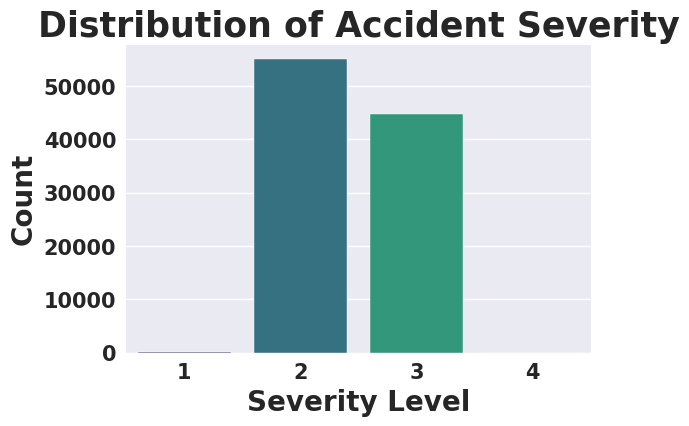

In [21]:
# Univariate Analysis: Distribution of Accident Severity
plt.figure(figsize=(6,4))
sns.countplot(x='Severity', data=df, palette='viridis')
plt.title("Distribution of Accident Severity")
plt.xlabel("Severity Level")
plt.ylabel("Count")
plt.show()

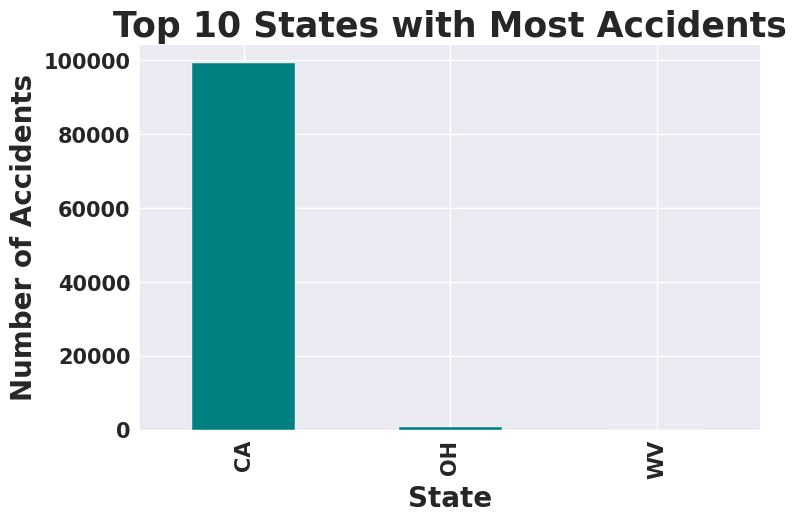

In [22]:
# Univariate Analysis: Accidents per State
top_states = df['State'].value_counts().head(10)
top_states.plot(kind='bar', figsize=(8,5), color='teal')
plt.title("Top 10 States with Most Accidents")
plt.xlabel("State")
plt.ylabel("Number of Accidents")
plt.show()

# Using Bivariate

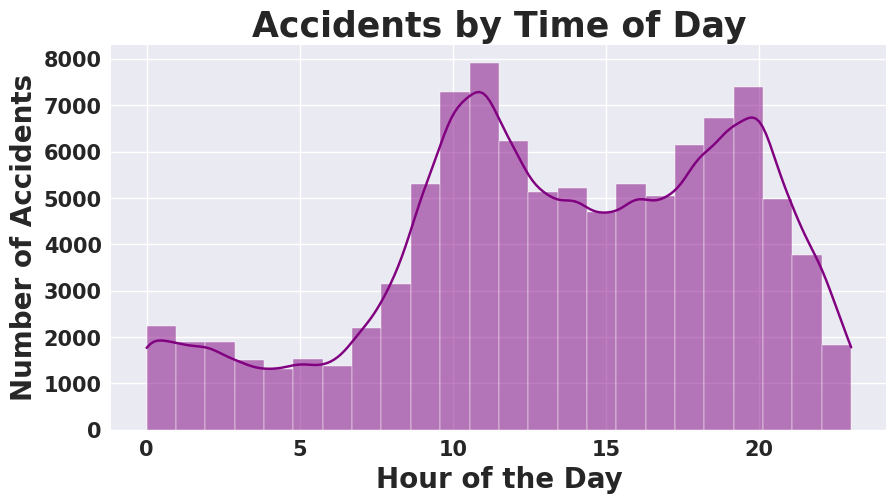

In [23]:
# Bivariate Analysis: Accidents by Time of Day
df['Hour'] = pd.to_datetime(df['Start_Time']).dt.hour
plt.figure(figsize=(10,5))
sns.histplot(df['Hour'], bins=24, kde=True, color='purple')
plt.title("Accidents by Time of Day")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Accidents")
plt.show()

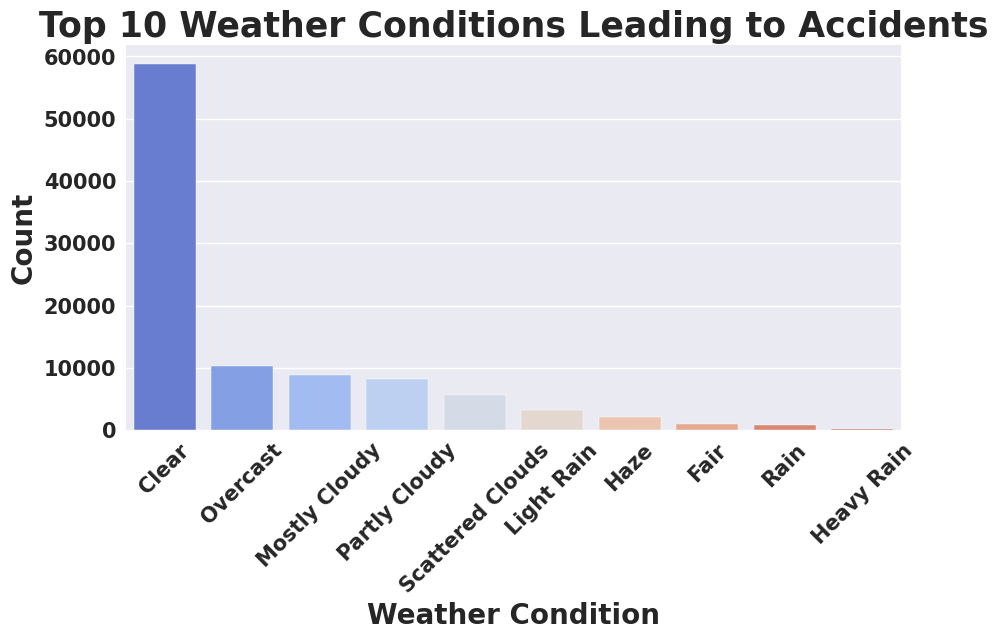

In [24]:
# Impact of Weather Conditions on Accidents
weather_counts = df['Weather_Condition'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=weather_counts.index, y=weather_counts.values, palette='coolwarm')
plt.title("Top 10 Weather Conditions Leading to Accidents")
plt.xlabel("Weather Condition")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


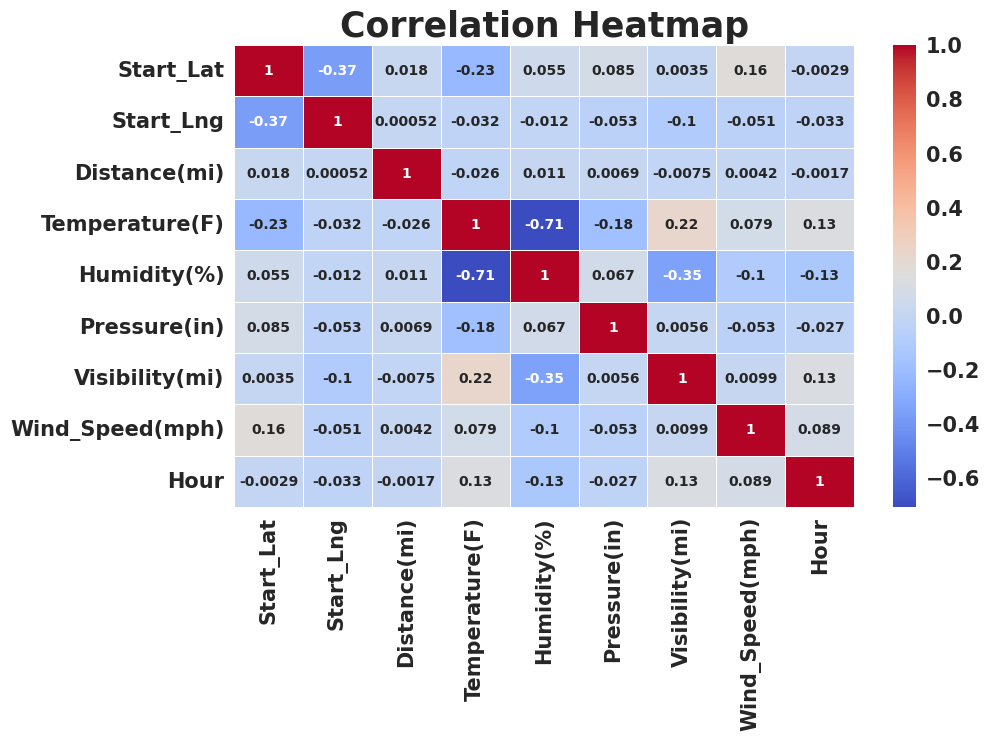

In [26]:
# Correlation Heatmap of Numerical Features
numerical_df = df.select_dtypes(include=np.number)  # Select only numerical columns
plt.figure(figsize=(10, 6))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [27]:
# Save processed data
df.to_csv("US_Accidents_EDA.csv", index=False)

# Visualize Insights

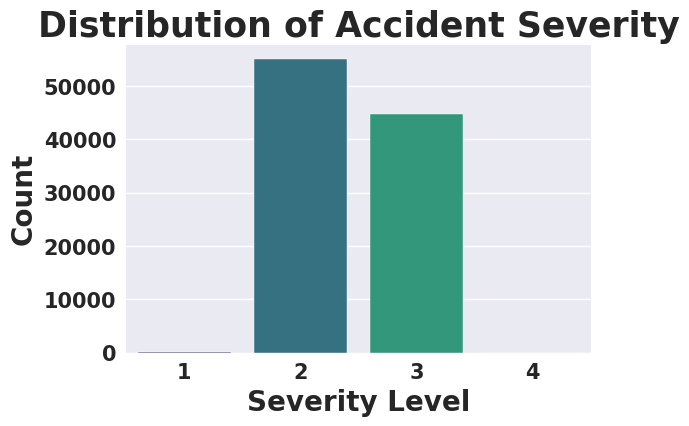

In [28]:
# 1. Accidents by Severity
plt.figure(figsize=(6,4))
sns.countplot(x='Severity', data=df, palette='viridis')
plt.title("Distribution of Accident Severity")
plt.xlabel("Severity Level")
plt.ylabel("Count")
plt.show()

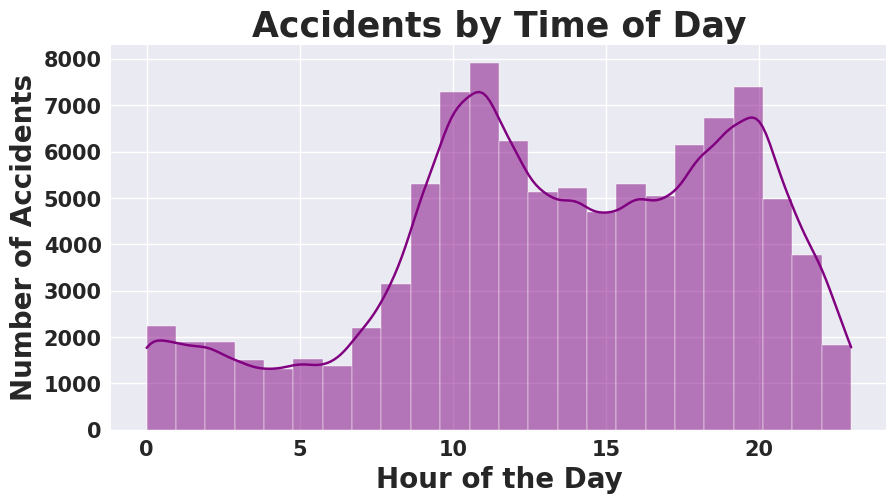

In [29]:
# 2. Accidents by Hour of the Day
df['Hour'] = pd.to_datetime(df['Start_Time']).dt.hour
plt.figure(figsize=(10,5))
sns.histplot(df['Hour'], bins=24, kde=True, color='purple')
plt.title("Accidents by Time of Day")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Accidents")
plt.show()

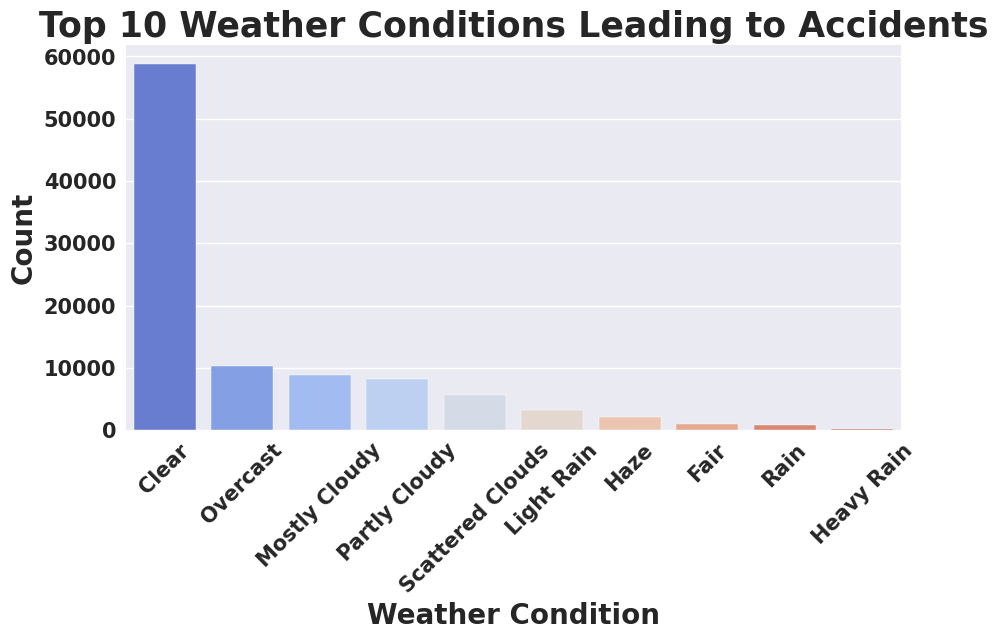

In [30]:
# 3. Accidents by Weather Condition
weather_counts = df['Weather_Condition'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=weather_counts.index, y=weather_counts.values, palette='coolwarm')
plt.title("Top 10 Weather Conditions Leading to Accidents")
plt.xlabel("Weather Condition")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


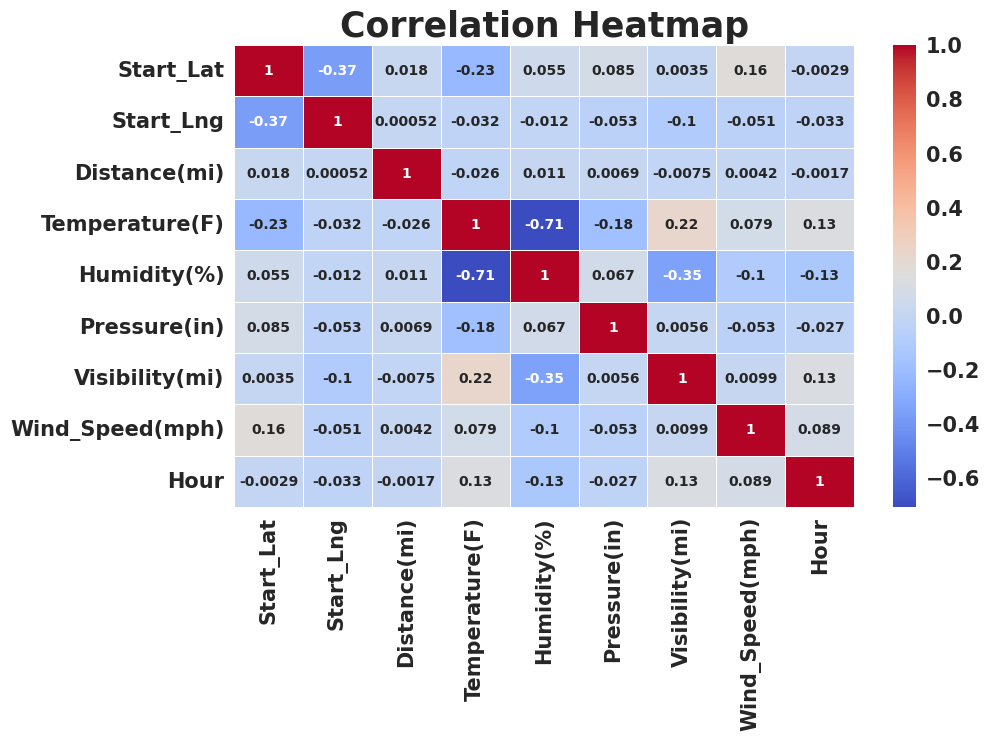

In [32]:
# 4. Correlation Heatmap of Numerical Features
numerical_df = df.select_dtypes(include=np.number)  # Select only numerical columns
plt.figure(figsize=(10, 6))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

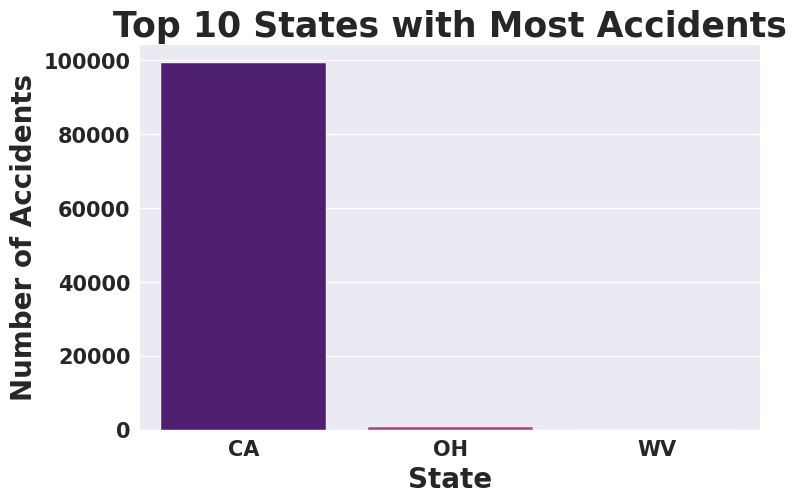

In [33]:
# 5. Top 10 States with Most Accidents
top_states = df['State'].value_counts().head(10)
plt.figure(figsize=(8,5))
sns.barplot(x=top_states.index, y=top_states.values, palette='magma')
plt.title("Top 10 States with Most Accidents")
plt.xlabel("State")
plt.ylabel("Number of Accidents")
plt.show()

In [34]:
# Save processed data with additional insights
df.to_csv("US_Accidents_Insights.csv", index=False)

# 5. Key Findings & Recommendations

Key Findings:

Most accidents occur during peak traffic hours (morning and evening rush hours).

Adverse weather conditions (rain, fog, and snow) significantly increase accident risks.

Higher speed limits and specific road types are correlated with severe accidents.

Urban areas experience higher accident rates due to traffic density.

Recommendations:

Implement better traffic management strategies during peak hours.

Improve road maintenance and drainage systems to mitigate weather-related accidents.

Enforce speed regulations and introduce speed-monitoring systems in high-risk areas.
Increase awareness campaigns on defensive driving in high-accident zones.

6. Conclusion

This case study provides valuable insights into road accident trends in the U.S. The analysis highlights critical factors influencing accidents and offers recommendations for reducing accident rates. Further research and real-time monitoring can enhance the effectiveness of road safety measures.
